In [1]:
import math
import random
import pandas as pd
import numpy as np

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')
plt.style.use ('ggplot')


In [10]:
df=pd.read_csv(r"C:\Users\sandr\Downloads\SalaryData_Test.csv")
df.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'educationno'),
  Text(2, 0, 'capitalgain'),
  Text(3, 0, 'capitalloss'),
  Text(4, 0, 'hoursperweek')])

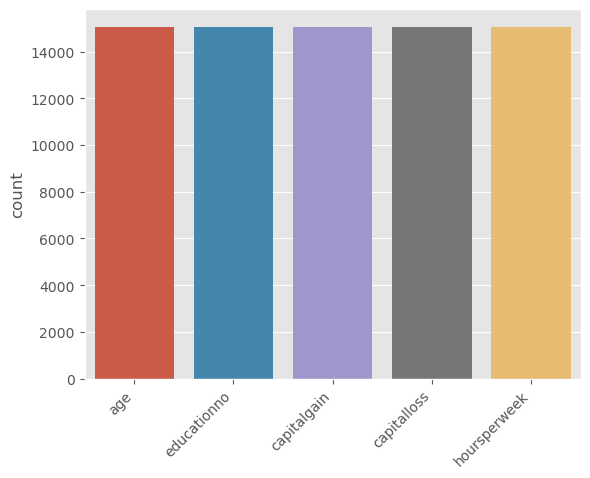

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,)
plt.xticks(rotation=45, ha='right')

<Axes: >

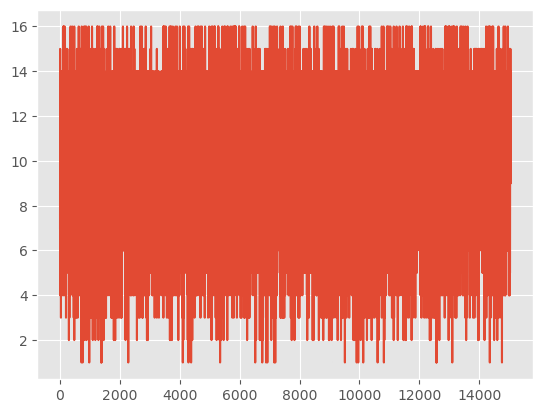

In [13]:
df['educationno'].plot()

<Axes: xlabel='age', ylabel='capitalgain'>

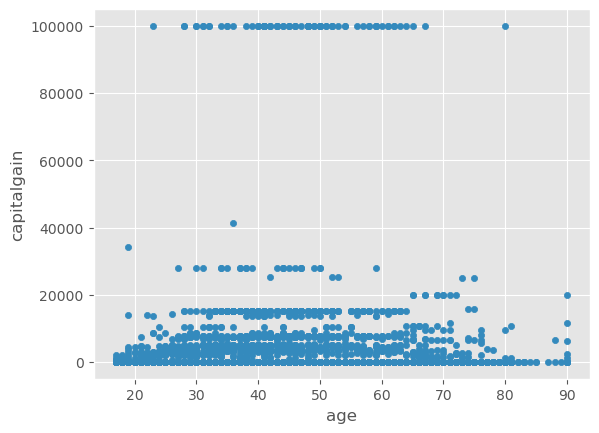

In [14]:
df.plot(kind ='scatter',x ='age', y="capitalgain")

capitalloss
0       1175.98
213        0.00
323        0.00
625        0.00
653        0.00
         ...   
2603       0.00
2824       0.00
3004       0.00
3175       0.00
3770       0.00
Name: capitalgain, Length: 79, dtype: float64


<Axes: xlabel='capitalloss'>

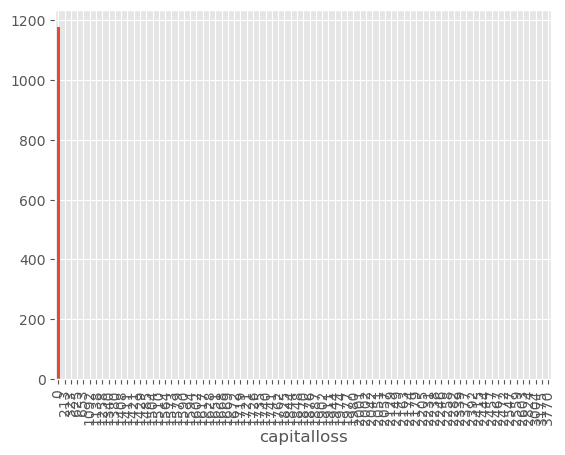

In [15]:
q= round(df.groupby("capitalloss")["capitalgain"].mean(),2)
print(q)
q.plot(kind ='bar')

array([<Axes: ylabel='capitalgain'>], dtype=object)

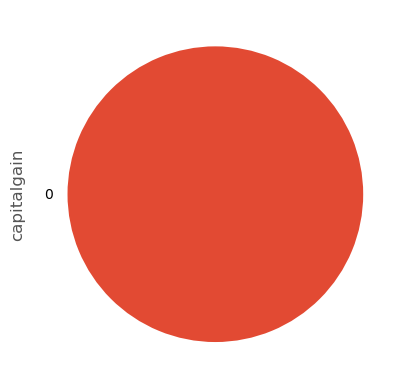

In [16]:
q.plot(kind ='pie',subplots =True)

array([<Axes: title={'center': 'capitalgain'}, xlabel='capitalloss'>],
      dtype=object)

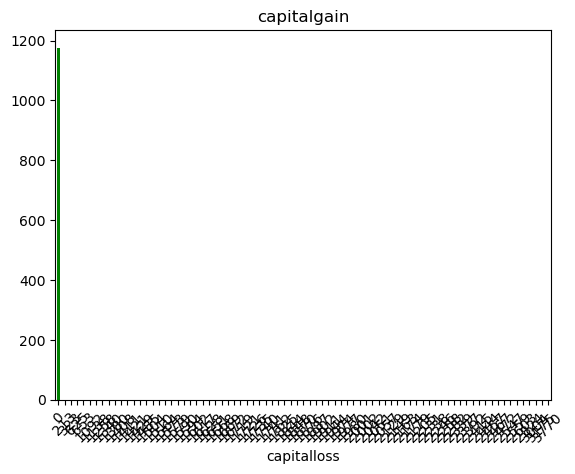

In [29]:
q.plot.bar(color =['green','red'],subplots =True,rot =45)

<Axes: >

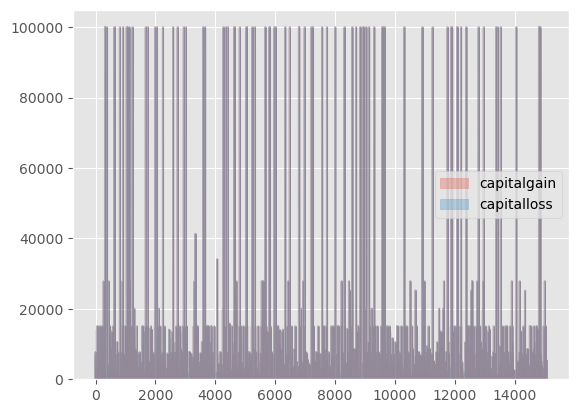

In [19]:
df[['capitalgain','capitalloss']].plot(kind ='area',alpha =0.3)

<Axes: ylabel='Density'>

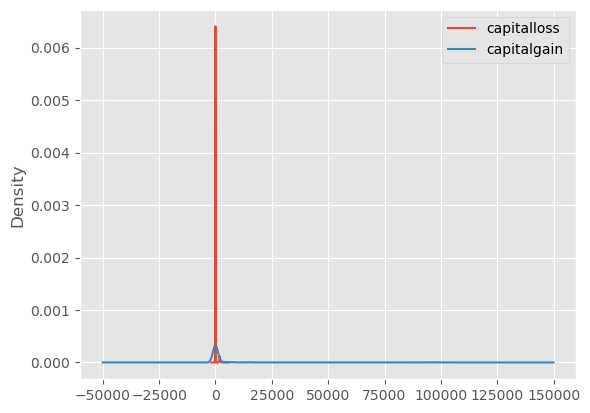

In [20]:
df[['capitalloss','capitalgain']].plot(kind='kde')

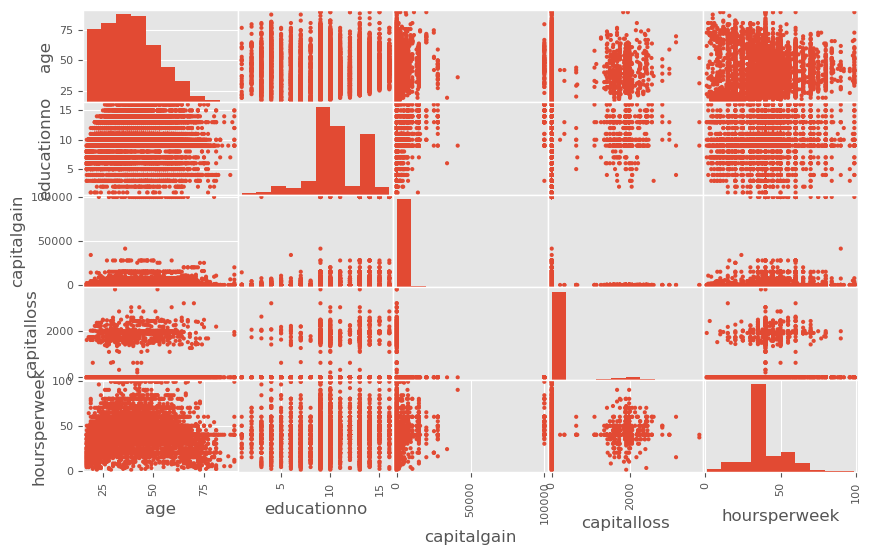

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=1,figsize=(10,6));

In [25]:
df1=pd.get_dummies(df, columns=['education','workclass','maritalstatus','occupation','relationship','race','sex','native'], drop_first=True)
df1

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,<=50K,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,50,<=50K,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0,0,40,>50K,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,7688,0,40,>50K,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,34,6,0,0,30,<=50K,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,<=50K,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
15056,39,13,0,0,36,<=50K,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
15057,38,13,0,0,50,<=50K,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
15058,44,13,5455,0,40,<=50K,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [26]:
X = df1.drop('Salary',axis=1)
y = df1['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = naive_bayes_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.90      0.86      0.88      2246
        >50K       0.64      0.71      0.67       766

    accuracy                           0.82      3012
   macro avg       0.77      0.79      0.78      3012
weighted avg       0.83      0.82      0.83      3012



In [27]:
labels=['<=50k','>=50k']

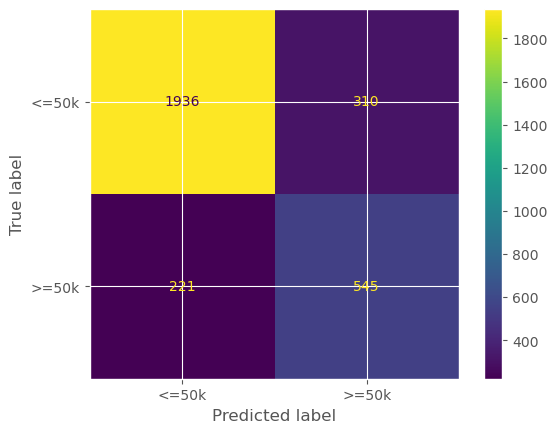

In [28]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
cm=confusion_matrix(y_test,predictions)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()